#  Hormone receptors status in breast cancer

## Data Exploration

In [131]:
import pandas as pd 
import numpy as np 
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [132]:
data = pd.read_excel("C:\\Users\\Paola\\Desktop\\TEXT MINING\Dataset.xlsx")

In [133]:
data.head(5)

,cod paz,id,numero caso,data referto,reparto,diagnosi,pezzo operatorio,topografia,summary,gross,er,pgr,her2,ki67,fish,modificato
0,74,2011055893,S2011-006911,12-09-2011,Degenze OCB Senologia,-NON EVIDENZA DI METASTASI A DUE LINFONODI ESA...,linf. sentinella ascella D,T-1963,NaN,Tessuto fibroadiposo da cui si isolano 2 linfo...,NaN,NaN,NaN,NaN,NaN,NaN
1,74,2011055891,S2011-006911,12-09-2011,Degenze OCB Senologia,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...,quadr. sup. mammella dx,T-1749,npl. mammella dx,Parenchima mammario di cm 5 x 4 x 4 con al tag...,"[66,100]","[33,66)",3+,NaN,NaN,NaN
2,74,2011055892,S2011-006911,12-09-2011,Degenze OCB Senologia,-PARENCHIMA MAMMARIO RIFERIBILE A REGIONE AREO...,dotti capezzolo D,T-1740,NaN,Frammento di cm 1.,NaN,NaN,NaN,NaN,NaN,NaN
3,74,2011055894,S2011-006911,12-09-2011,Degenze OCB Senologia,-PARENCHIMA MAMMARIO CON FOCOLAI MULTIFOCALI D...,quadrante equatoriale interno mammella S,T-1749,NaN,Parenchima mammario di cm 3x2x1. Al taglio par...,NaN,NaN,NaN,NaN,NaN,NaN
4,74,2011055895,S2011-006911,12-09-2011,Degenze OCB Senologia,--PARENCHIMA MAMMARIO CON FOCOLAI MULTIFOCALI ...,mammella D,T-1749,NaN,"Mammella di cm 20x12 x3 priva di cute, con are...",NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
data.shape

(74871, 16)

In [135]:
#There are a lot of null value in er/pgr - from 75k to 15k
data.isnull().sum()

cod paz                 0
id                      0
numero caso             0
data referto            0
reparto                37
diagnosi              509
pezzo operatorio     1998
topografia           6676
summary             47251
gross               11580
er                  59966
pgr                 59985
her2                59980
ki67                60471
fish                72279
modificato          73064
dtype: int64

In [136]:
data['er'] = data['er'].astype(str)

In [137]:
#let's see which are the possible values in er and pgr
data['er'].unique()

array(['nan', '[66,100]', '[0,1)', '95', '[33,66)', '[10,33)', 'negativo',
       '[95,100]', '0', '90', '[1,10)', '40', '15', '100', '5', '70', '1',
       '2', '85', '45', '50', '(90,100]', '80', '(95,100]', '30', '+',
       '97', '20', '10', '75', '60', '[0,5)', '98', '99', '<95', '25',
       '92', '7', '4', '55', '8', '[0,95)', '3', '23', '65', '35', '14',
       '[80,100]', '22', '-', '[0,10)', '82', '9', '[10,15)', '6', '>)5'],
      dtype=object)

In [238]:
data.pgr.value_counts() 

[95,100]    2206
0           2075
[66,100]    1491
[0,1)       1141
95           917
            ... 
(9,100]        1
(80,100]       1
26             1
94             1
79             1
Name: pgr, Length: 70, dtype: int64

In [138]:
np.unique(data.er)

array(['(90,100]', '(95,100]', '+', '-', '0', '1', '10', '100', '14',
       '15', '2', '20', '22', '23', '25', '3', '30', '35', '4', '40',
       '45', '5', '50', '55', '6', '60', '65', '7', '70', '75', '8', '80',
       '82', '85', '9', '90', '92', '95', '97', '98', '99', '<95', '>)5',
       '[0,1)', '[0,10)', '[0,5)', '[0,95)', '[1,10)', '[10,15)',
       '[10,33)', '[33,66)', '[66,100]', '[80,100]', '[95,100]', 'nan',
       'negativo'], dtype=object)

In [139]:
data['pgr'] = data['pgr'].astype(str)

In [140]:
np.unique(data.pgr)

array(['(1,100]', '(10,100]', '(80,100]', '(9,100]', '(90,100]', '+', '-',
       '0', '1', '10', '100', '12', '14', '15', '16', '18', '19', '2',
       '20', '22', '25', '26', '28', '3', '30', '35', '4', '40', '43',
       '45', '46', '47', '5', '5-10', '50', '55', '6', '60', '65', '66',
       '7', '70', '73', '75', '79', '8', '80', '85', '9', '90', '92',
       '93', '94', '95', '98', '99', '[0,1)', '[0,10)', '[0,2)', '[0,30)',
       '[0,5)', '[1,10)', '[1,2)', '[10,33)', '[33,66)', '[5,10]',
       '[66,100]', '[70,100]', '[95,100]', 'nan', 'negativo'],
      dtype=object)

In [141]:
data['her2'] = data['her2'].astype(str)

In [142]:
np.unique(data.her2)

array(['0', '1+', '2+', '3+', 'nan', 'negativo', 'positivo'], dtype=object)

In [143]:
data['ki67'] = data['ki67'].astype(str)

In [144]:
np.unique(data.ki67)

array(['(10,100]', '(30,100]', '(40,100]', '(43,100]', '(50,100]',
       '(60,100]', '(68,100]', '(80,100]', '(90,100]', '0', '1', '1,7',
       '10', "10'", '100', '11', '12', '12,8', '13', '14', '15', '15,3',
       '15,4', '15,8', '15-20', '16', '16,6', '17', '17,5', '18', '18,5',
       '19', '2', '20', '20,4', '21', '22', '22,2', '22,3', '22,7', '23',
       '24', '24,2', '24,3', '25', '26', '27', '27,5', '28', '28,5', '29',
       '3', '30', '31', '31,5', '32', '32,7', '33', '34', '34,5', '35',
       '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55',
       '56', '57', '58', '6', '60', '61', '62', '63', '64', '65', '67',
       '68', '69', '7', '70', '71', '72', '73', '75', '76', '77', '78',
       '8', '80', '81', '82', '83', '85', '86', '87', '88', '9', '9,5',
       '90', '92', '95', '97', '98', '????', '[0,10)', '[0,12)', '[0,2)',
       '[0,5)', '[0,55)', '[1,2)', '[10,15)', '[10,30)', '[

In [145]:
data['fish'] = data['fish'].astype(str)

In [146]:
np.unique(data.fish)

array(['amplificato', 'nan', 'non amplificato'], dtype=object)

<AxesSubplot:>

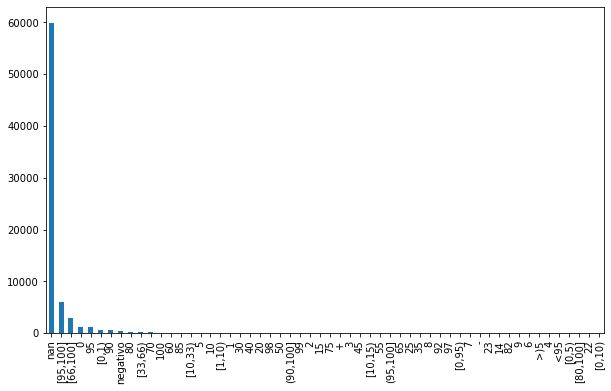

In [147]:
#let's see the distribution of our values  - er unbalanced
data.er.value_counts().plot(kind="bar", figsize = (10,6))

<AxesSubplot:>

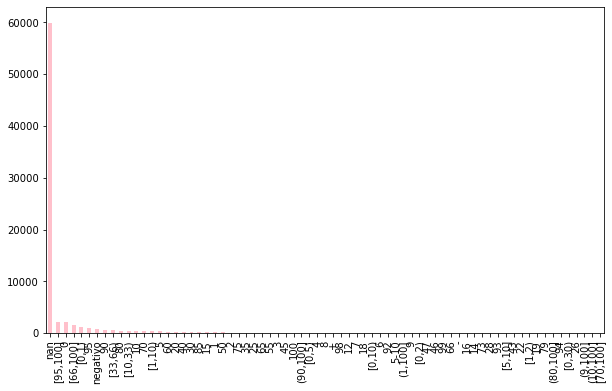

In [148]:
#pgr unbalanced
data.pgr.value_counts().plot(kind="bar", figsize = (10,6), color = "pink")

In [149]:
#exclude Nan Values from estrogen and progestogen
data = data[data["er"] != "nan"]
data = data[data["pgr"] != "nan"]

<AxesSubplot:>

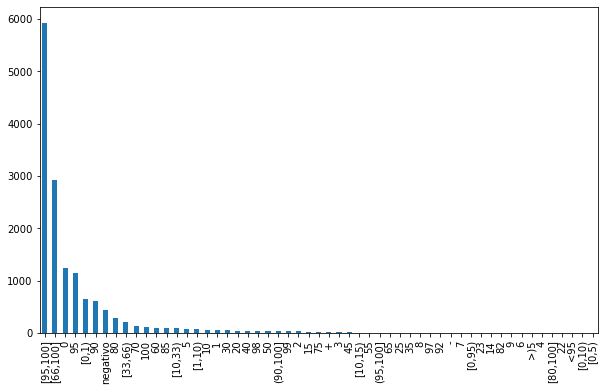

In [150]:
#re-plot data
data.er.value_counts().plot(kind="bar", figsize = (10,6))

<AxesSubplot:>

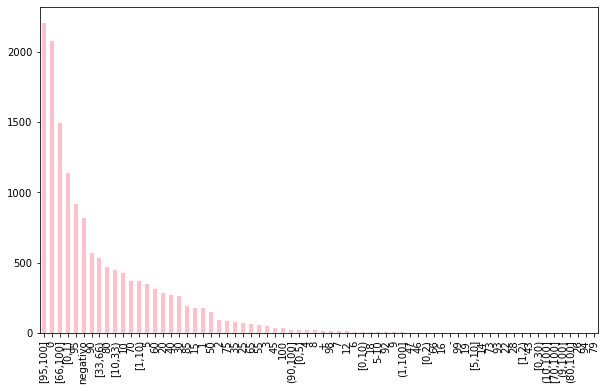

In [151]:

data.pgr.value_counts().plot(kind="bar", figsize = (10,6), color = "pink")

In [152]:
data.head(2)

,cod paz,id,numero caso,data referto,reparto,diagnosi,pezzo operatorio,topografia,summary,gross,er,pgr,her2,ki67,fish,modificato
1,74,2011055891,S2011-006911,12-09-2011,Degenze OCB Senologia,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...,quadr. sup. mammella dx,T-1749,npl. mammella dx,Parenchima mammario di cm 5 x 4 x 4 con al tag...,"[66,100]","[33,66)",3+,nan,nan,NaN
11,74,2011055891,S2011-006911,12-09-2011,Degenze OCB Senologia,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...,quadr. sup. mammella dx,T-1749,npl. mammella dx,Parenchima mammario di cm 5 x 4 x 4 con al tag...,"[66,100]","[33,66)",3+,nan,nan,NaN


In [153]:
data["text"] = data["diagnosi"] + data["pezzo operatorio"]

In [154]:
data.head()

,cod paz,id,numero caso,data referto,reparto,diagnosi,pezzo operatorio,topografia,summary,gross,er,pgr,her2,ki67,fish,modificato,text
1,74,2011055891,S2011-006911,12-09-2011,Degenze OCB Senologia,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...,quadr. sup. mammella dx,T-1749,npl. mammella dx,Parenchima mammario di cm 5 x 4 x 4 con al tag...,"[66,100]","[33,66)",3+,nan,nan,NaN,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...
11,74,2011055891,S2011-006911,12-09-2011,Degenze OCB Senologia,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...,quadr. sup. mammella dx,T-1749,npl. mammella dx,Parenchima mammario di cm 5 x 4 x 4 con al tag...,"[66,100]","[33,66)",3+,nan,nan,NaN,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...
20,299,2012013996,C2012-000276,14-11-2011,Esterni,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...,11- I- 19036 ; mammella sx,T-1749,carcinoma duttale infiltrante,"N del caso: 11 -I -19036 ( 1,2,3,4,5 )Ospedal...","[66,100]","[10,33)",1+,15,nan,NaN,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...
28,299,2012013996,C2012-000276,14-11-2011,Esterni,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...,11- I- 19036 ; mammella sx,T-1749,carcinoma duttale infiltrante,"N del caso: 11 -I -19036 ( 1,2,3,4,5 )Ospedal...","[66,100]","[10,33)",1+,15,nan,NaN,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...
39,102,2011008477,B2011-005462,31-08-2011,AMB RDC Radiologia C RADIOLOGIA SENOLOGICA,Risultato degli esami immunoistochimici effett...,NaN,NaN,NaN,NaN,"[0,1)","[1,10)",0,"(30,100]",nan,NaN,NaN


In [155]:
data.text.values[0]

"CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con aspetti di tipo apocrinoGrado nucleare :IIIGrado istologico (EPWG):III con cancerizzazione lobulare.Necrosi tumorale:PresenteCalcificazioni:PresentiDistribuzione del carcinoma in situ:MultifocaleDimensioni della neoplasia in situ: foci multifocali il maggiore di cm 1,5Focale immagine di permeazione neoplastica vascolare attribuibile a trasporto da manovre bioptiche.Assetto recettoriale, immunoreattivita' di membrana per Her-2/neu e frazione proliferante:ER, Proporzione di cellule positive nella sezione esaminata:>=66% e 100%    PgR, Proporzione di cellule positive nella sezione esaminata:>=33% e <66%     Immunoreattività di membrana per Her-2/neu (anticorpo policlonale Dako):3+ (fortemente positivo)quadr. sup. mammella dx"

In [156]:
data['summary'] = data['summary'].astype(str)

In [157]:
#doing this we exclude nan values in column summary
data[data['summary'].apply(len)>3]

,cod paz,id,numero caso,data referto,reparto,diagnosi,pezzo operatorio,topografia,summary,gross,er,pgr,her2,ki67,fish,modificato,text
1,74,2011055891,S2011-006911,12-09-2011,Degenze OCB Senologia,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...,quadr. sup. mammella dx,T-1749,npl. mammella dx,Parenchima mammario di cm 5 x 4 x 4 con al tag...,"[66,100]","[33,66)",3+,nan,nan,NaN,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...
11,74,2011055891,S2011-006911,12-09-2011,Degenze OCB Senologia,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...,quadr. sup. mammella dx,T-1749,npl. mammella dx,Parenchima mammario di cm 5 x 4 x 4 con al tag...,"[66,100]","[33,66)",3+,nan,nan,NaN,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...
20,299,2012013996,C2012-000276,14-11-2011,Esterni,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...,11- I- 19036 ; mammella sx,T-1749,carcinoma duttale infiltrante,"N del caso: 11 -I -19036 ( 1,2,3,4,5 )Ospedal...","[66,100]","[10,33)",1+,15,nan,NaN,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...
28,299,2012013996,C2012-000276,14-11-2011,Esterni,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...,11- I- 19036 ; mammella sx,T-1749,carcinoma duttale infiltrante,"N del caso: 11 -I -19036 ( 1,2,3,4,5 )Ospedal...","[66,100]","[10,33)",1+,15,nan,NaN,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...
48,12,2011057243,S2011-007434,29-09-2011,Degenze OCB Senologia,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...,nodulo QE mamm. D,T-1749,npl mammella D,Parenchima mammario di cm 6x4x3 con un nodulo ...,"[66,100]","[1,10)",1+,35,nan,NaN,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74855,8682,2018005513,B2018-000081,04-01-2018,AMB RDC Radiologia C RADIOLOGIA SENOLOGICA,"Assetto recettoriale, immunoreattivita' di mem...",frammenti da adenopatia ascellare dx diametro ...,T-1749,adenopatia ascellare a dx,In formalina: numero 3 frammenti di dimensio...,"[95,100]",15,2+,35,nan,NaN,"Assetto recettoriale, immunoreattivita' di mem..."
74856,8682,2018010720,B2018-000072,04-01-2018,AMB RDC Radiologia C RADIOLOGIA SENOLOGICA,"Assetto recettoriale, immunoreattivita' di mem...",frammenti da nodulo sospetto diametro 15 mm QI...,T-1749,nodulo solido sospetto,In formalina: numero 2 frammenti di dimensio...,"[95,100]",20,3+,20,nan,NaN,"Assetto recettoriale, immunoreattivita' di mem..."
74861,8682,2018010721,B2018-000077,04-01-2018,AMB RDC Radiologia C RADIOLOGIA SENOLOGICA,"Assetto recettoriale, immunoreattivita' di mem...",frammenti da nodulo sospetto diametro 17 mm a ...,T-1749,nodulo solido sospetto,In formalina: numero 6 frammenti di dimensio...,"[95,100]","[95,100]",1+,8,nan,NaN,"Assetto recettoriale, immunoreattivita' di mem..."
74865,8682,2018005513,B2018-000081,04-01-2018,AMB RDC Radiologia C RADIOLOGIA SENOLOGICA,"Assetto recettoriale, immunoreattivita' di mem...",frammenti da adenopatia ascellare dx diametro ...,T-1749,adenopatia ascellare a dx,In formalina: numero 3 frammenti di dimensio...,"[95,100]",15,2+,35,nan,NaN,"Assetto recettoriale, immunoreattivita' di mem..."


In [158]:
data.shape

(14828, 17)

In [159]:
data['pezzo operatorio'] = data['pezzo operatorio'].astype(str)

In [160]:
data['diagnosi'] = data['diagnosi'].astype(str)

In [161]:
np.unique(data["pezzo operatorio"])

array(['(a) neof. mammaria II  sin, (b) QII sin',
       '1 frustolo  core biopsy',
       '1 frustolo diderma e di neoplasia mammella dx', ...,
       'tumefazione di consistenza molto dura',
       'tumefazione di diametro 5 cm mammella D',
       'tumefazione retro areolare diam. 5 cm mammella dx'], dtype=object)

In [162]:
#at the end our column text it will be a concatenation of diagnosi, pezzo operatorio and summary

data["text"] = data["diagnosi"] + data["pezzo operatorio"]+ data["summary"]

In [163]:
#example of our new column
data.text.values[23]

'Risultato degli esami immunoistochimici effettuati:ER-ICA Proporzione di cellule positive nella sezione esaminata:>=66% e 100%  PgR-ICA Proporzione di cellule positive nella sezione esaminata:>=33% e <66%  p185(Her 2 neu):2+ (debolmente positivo)nannan'

In [164]:
#checking that there is no nan values in text, evene if some components are nan
data.head(10)

,cod paz,id,numero caso,data referto,reparto,diagnosi,pezzo operatorio,topografia,summary,gross,er,pgr,her2,ki67,fish,modificato,text
1,74,2011055891,S2011-006911,12-09-2011,Degenze OCB Senologia,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...,quadr. sup. mammella dx,T-1749,npl. mammella dx,Parenchima mammario di cm 5 x 4 x 4 con al tag...,"[66,100]","[33,66)",3+,nan,nan,NaN,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...
11,74,2011055891,S2011-006911,12-09-2011,Degenze OCB Senologia,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...,quadr. sup. mammella dx,T-1749,npl. mammella dx,Parenchima mammario di cm 5 x 4 x 4 con al tag...,"[66,100]","[33,66)",3+,nan,nan,NaN,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...
20,299,2012013996,C2012-000276,14-11-2011,Esterni,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...,11- I- 19036 ; mammella sx,T-1749,carcinoma duttale infiltrante,"N del caso: 11 -I -19036 ( 1,2,3,4,5 )Ospedal...","[66,100]","[10,33)",1+,15,nan,NaN,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...
28,299,2012013996,C2012-000276,14-11-2011,Esterni,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...,11- I- 19036 ; mammella sx,T-1749,carcinoma duttale infiltrante,"N del caso: 11 -I -19036 ( 1,2,3,4,5 )Ospedal...","[66,100]","[10,33)",1+,15,nan,NaN,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...
39,102,2011008477,B2011-005462,31-08-2011,AMB RDC Radiologia C RADIOLOGIA SENOLOGICA,Risultato degli esami immunoistochimici effett...,nan,NaN,nan,NaN,"[0,1)","[1,10)",0,"(30,100]",nan,NaN,Risultato degli esami immunoistochimici effett...
45,102,2011058933,S2011-008023,19-10-2011,Degenze OCB Senologia,CARCINOMA INVASIVO DELLA MAMMELLAGrado istolog...,mammella S,T-1749,nan,Mammella S di cm 18x8x4 con losanga di cute di...,"[0,1)","[0,1)",2+,"(30,100]",nan,1.0,CARCINOMA INVASIVO DELLA MAMMELLAGrado istolog...
48,12,2011057243,S2011-007434,29-09-2011,Degenze OCB Senologia,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...,nodulo QE mamm. D,T-1749,npl mammella D,Parenchima mammario di cm 6x4x3 con un nodulo ...,"[66,100]","[1,10)",1+,35,nan,NaN,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...
50,13,2011057297,S2011-007446,29-09-2011,Degenze OCB Senologia,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...,Mammella S.,T-1749,nan,Mammella priva di cute e capezzolo di cm 20x20...,"[66,100]","[66,100]",2+,30,nan,NaN,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...
55,93,2011059162,S2011-008103,21-10-2011,Degenze OCB Senologia,"1,3) CARCINOMA INVASIVO DELLA MAMMELLASottotip...",nodulo infra-areolare mammella S,T-1749,npl mammella S C4,Parenchima mammario di cm 4 di asse maggiore c...,95,95,0,26,nan,1.0,"1,3) CARCINOMA INVASIVO DELLA MAMMELLASottotip..."
63,93,2011059162,S2011-008103,21-10-2011,Degenze OCB Senologia,"1,3) CARCINOMA INVASIVO DELLA MAMMELLASottotip...",nodulo infra-areolare mammella S,T-1749,npl mammella S C4,Parenchima mammario di cm 4 di asse maggiore c...,95,95,0,26,nan,1.0,"1,3) CARCINOMA INVASIVO DELLA MAMMELLASottotip..."


In [165]:
data.isnull().sum()

cod paz                 0
id                      0
numero caso             0
data referto            0
reparto                 6
diagnosi                0
pezzo operatorio        0
topografia           2598
summary                 0
gross                1337
er                      0
pgr                     0
her2                    0
ki67                    0
fish                    0
modificato          13286
text                    0
dtype: int64

## Data preparation

In [166]:
#!pip install neattext
import neattext.functions as nfx 
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize.treebank import TreebankWordDetokenizer

In [167]:
def lower_case(text): 
  return text.lower()

stop = stopwords.words('italian')

In [168]:

data["text_cleaned"] = data["text"].apply(nfx.remove_special_characters)
#data["text_cleaned"] = data["text_cleaned"].apply(nfx.remove_bad_quotes)
data["text_cleaned"] = data["text_cleaned"].apply(nfx.remove_punctuations)
data["text_cleaned"] = data["text_cleaned"].apply(nfx.remove_numbers)
data["text_cleaned"] = data["text_cleaned"].apply(nfx.remove_multiple_spaces)
data["text_cleaned"] = data["text_cleaned"].apply(lower_case)
data["text_cleaned"]= data["text_cleaned"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [169]:
#check column text vs text_Cleaned to see the differences
data.text_cleaned.values[1]

'carcinoma mammella duttale situ aspetti tipo apocrinogrado nucleare iiigrado istologico epwgiii cancerizzazione lobularenecrosi tumoralepresentecalcificazionipresentidistribuzione carcinoma situmultifocaledimensioni neoplasia situ foci multifocali maggiore cm focale immagine permeazione neoplastica vascolare attribuibile trasporto manovre biopticheassetto recettoriale immunoreattivita membrana herneu frazione proliferanteer proporzione cellule positive sezione esaminata pgr proporzione cellule positive sezione esaminata immunoreattivit membrana herneu anticorpo policlonale dako fortemente positivoquadr sup mammella dxnpl mammella dx'

In [170]:
data.text.values[1]

"CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con aspetti di tipo apocrinoGrado nucleare :IIIGrado istologico (EPWG):III con cancerizzazione lobulare.Necrosi tumorale:PresenteCalcificazioni:PresentiDistribuzione del carcinoma in situ:MultifocaleDimensioni della neoplasia in situ: foci multifocali il maggiore di cm 1,5Focale immagine di permeazione neoplastica vascolare attribuibile a trasporto da manovre bioptiche.Assetto recettoriale, immunoreattivita' di membrana per Her-2/neu e frazione proliferante:ER, Proporzione di cellule positive nella sezione esaminata:>=66% e 100%    PgR, Proporzione di cellule positive nella sezione esaminata:>=33% e <66%     Immunoreattività di membrana per Her-2/neu (anticorpo policlonale Dako):3+ (fortemente positivo)quadr. sup. mammella dxnpl. mammella dx"

In [171]:
np.unique(data["er"])
#make sense to predict some intervals eg neg, 0-5,5-10 and so on

array(['(90,100]', '(95,100]', '+', '-', '0', '1', '10', '100', '14',
       '15', '2', '20', '22', '23', '25', '3', '30', '35', '4', '40',
       '45', '5', '50', '55', '6', '60', '65', '7', '70', '75', '8', '80',
       '82', '85', '9', '90', '92', '95', '97', '98', '99', '<95', '>)5',
       '[0,1)', '[0,10)', '[0,5)', '[0,95)', '[1,10)', '[10,15)',
       '[10,33)', '[33,66)', '[66,100]', '[80,100]', '[95,100]',
       'negativo'], dtype=object)

In [172]:
tokenizer = RegexpTokenizer(
    "(?:(?<=\s)|(?<=^)|(?<=[>\"]))[a-z-']+(?:(?=\s)|(?=\:\s)|(?=$)|(?=[.!,;\"]))"
)

In [173]:
data["text_tokenize"] = data.text_cleaned.apply(tokenizer.tokenize)

In [174]:
data.head()

,cod paz,id,numero caso,data referto,reparto,diagnosi,pezzo operatorio,topografia,summary,gross,er,pgr,her2,ki67,fish,modificato,text,text_cleaned,text_tokenize
1,74,2011055891,S2011-006911,12-09-2011,Degenze OCB Senologia,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...,quadr. sup. mammella dx,T-1749,npl. mammella dx,Parenchima mammario di cm 5 x 4 x 4 con al tag...,"[66,100]","[33,66)",3+,nan,nan,NaN,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...,carcinoma mammella duttale situ aspetti tipo a...,"[carcinoma, mammella, duttale, situ, aspetti, ..."
11,74,2011055891,S2011-006911,12-09-2011,Degenze OCB Senologia,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...,quadr. sup. mammella dx,T-1749,npl. mammella dx,Parenchima mammario di cm 5 x 4 x 4 con al tag...,"[66,100]","[33,66)",3+,nan,nan,NaN,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...,carcinoma mammella duttale situ aspetti tipo a...,"[carcinoma, mammella, duttale, situ, aspetti, ..."
20,299,2012013996,C2012-000276,14-11-2011,Esterni,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...,11- I- 19036 ; mammella sx,T-1749,carcinoma duttale infiltrante,"N del caso: 11 -I -19036 ( 1,2,3,4,5 )Ospedal...","[66,100]","[10,33)",1+,15,nan,NaN,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...,carcinoma invasivo mammellasottotipo duttale n...,"[carcinoma, invasivo, mammellasottotipo, dutta..."
28,299,2012013996,C2012-000276,14-11-2011,Esterni,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...,11- I- 19036 ; mammella sx,T-1749,carcinoma duttale infiltrante,"N del caso: 11 -I -19036 ( 1,2,3,4,5 )Ospedal...","[66,100]","[10,33)",1+,15,nan,NaN,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...,carcinoma invasivo mammellasottotipo duttale n...,"[carcinoma, invasivo, mammellasottotipo, dutta..."
39,102,2011008477,B2011-005462,31-08-2011,AMB RDC Radiologia C RADIOLOGIA SENOLOGICA,Risultato degli esami immunoistochimici effett...,nan,NaN,nan,NaN,"[0,1)","[1,10)",0,"(30,100]",nan,NaN,Risultato degli esami immunoistochimici effett...,risultato esami immunoistochimici effettuatier...,"[risultato, esami, immunoistochimici, effettua..."


In [175]:
data.text_cleaned.values[0]

'carcinoma mammella duttale situ aspetti tipo apocrinogrado nucleare iiigrado istologico epwgiii cancerizzazione lobularenecrosi tumoralepresentecalcificazionipresentidistribuzione carcinoma situmultifocaledimensioni neoplasia situ foci multifocali maggiore cm focale immagine permeazione neoplastica vascolare attribuibile trasporto manovre biopticheassetto recettoriale immunoreattivita membrana herneu frazione proliferanteer proporzione cellule positive sezione esaminata pgr proporzione cellule positive sezione esaminata immunoreattivit membrana herneu anticorpo policlonale dako fortemente positivoquadr sup mammella dxnpl mammella dx'

In [176]:
data.text_tokenize.values[0]

['carcinoma',
 'mammella',
 'duttale',
 'situ',
 'aspetti',
 'tipo',
 'apocrinogrado',
 'nucleare',
 'iiigrado',
 'istologico',
 'epwgiii',
 'cancerizzazione',
 'lobularenecrosi',
 'tumoralepresentecalcificazionipresentidistribuzione',
 'carcinoma',
 'situmultifocaledimensioni',
 'neoplasia',
 'situ',
 'foci',
 'multifocali',
 'maggiore',
 'cm',
 'focale',
 'immagine',
 'permeazione',
 'neoplastica',
 'vascolare',
 'attribuibile',
 'trasporto',
 'manovre',
 'biopticheassetto',
 'recettoriale',
 'immunoreattivita',
 'membrana',
 'herneu',
 'frazione',
 'proliferanteer',
 'proporzione',
 'cellule',
 'positive',
 'sezione',
 'esaminata',
 'pgr',
 'proporzione',
 'cellule',
 'positive',
 'sezione',
 'esaminata',
 'immunoreattivit',
 'membrana',
 'herneu',
 'anticorpo',
 'policlonale',
 'dako',
 'fortemente',
 'positivoquadr',
 'sup',
 'mammella',
 'dxnpl',
 'mammella',
 'dx']

In [177]:
def stemming(text):
  stemming = SnowballStemmer(language='italian')
  return[stemming.stem(word) for word in text]

In [178]:
data["text_stemming"] = data["text_tokenize"].apply(stemming)

In [179]:
data.tail()

,cod paz,id,numero caso,data referto,reparto,diagnosi,pezzo operatorio,topografia,summary,gross,er,pgr,her2,ki67,fish,modificato,text,text_cleaned,text_tokenize,text_stemming
74859,8682,2018110062,S2018-007188,03-10-2018,Degenze OCB Senologia,"Assetto recettoriale, immunoreattivita' di mem...",nan,NaN,nan,NaN,90,0,1+,3,nan,NaN,"Assetto recettoriale, immunoreattivita' di mem...",assetto recettoriale immunoreattivita membrana...,"[assetto, recettoriale, immunoreattivita, memb...","[assett, recettorial, immunoreattiv, membran, ..."
74861,8682,2018010721,B2018-000077,04-01-2018,AMB RDC Radiologia C RADIOLOGIA SENOLOGICA,"Assetto recettoriale, immunoreattivita' di mem...",frammenti da nodulo sospetto diametro 17 mm a ...,T-1749,nodulo solido sospetto,In formalina: numero 6 frammenti di dimensio...,"[95,100]","[95,100]",1+,8,nan,NaN,"Assetto recettoriale, immunoreattivita' di mem...",assetto recettoriale immunoreattivita membrana...,"[assetto, recettoriale, immunoreattivita, memb...","[assett, recettorial, immunoreattiv, membran, ..."
74865,8682,2018005513,B2018-000081,04-01-2018,AMB RDC Radiologia C RADIOLOGIA SENOLOGICA,"Assetto recettoriale, immunoreattivita' di mem...",frammenti da adenopatia ascellare dx diametro ...,T-1749,adenopatia ascellare a dx,In formalina: numero 3 frammenti di dimensio...,"[95,100]",15,2+,35,nan,NaN,"Assetto recettoriale, immunoreattivita' di mem...",assetto recettoriale immunoreattivita membrana...,"[assetto, recettoriale, immunoreattivita, memb...","[assett, recettorial, immunoreattiv, membran, ..."
74866,8682,2018010720,B2018-000072,04-01-2018,AMB RDC Radiologia C RADIOLOGIA SENOLOGICA,"Assetto recettoriale, immunoreattivita' di mem...",frammenti da nodulo sospetto diametro 15 mm QI...,T-1749,nodulo solido sospetto,In formalina: numero 2 frammenti di dimensio...,"[95,100]",20,3+,20,nan,NaN,"Assetto recettoriale, immunoreattivita' di mem...",assetto recettoriale immunoreattivita membrana...,"[assetto, recettoriale, immunoreattivita, memb...","[assett, recettorial, immunoreattiv, membran, ..."
74869,8682,2018110062,S2018-007188,03-10-2018,Degenze OCB Senologia,"Assetto recettoriale, immunoreattivita' di mem...",nan,NaN,nan,NaN,90,0,1+,3,nan,NaN,"Assetto recettoriale, immunoreattivita' di mem...",assetto recettoriale immunoreattivita membrana...,"[assetto, recettoriale, immunoreattivita, memb...","[assett, recettorial, immunoreattiv, membran, ..."


In [180]:
data.shape

(14828, 20)

In [181]:
data.text_stemming.values[0]

['carcinom',
 'mammell',
 'duttal',
 'situ',
 'aspett',
 'tip',
 'apocrinograd',
 'nucl',
 'iiigrad',
 'istolog',
 'epwgii',
 'cancerizz',
 'lobularenecr',
 'tumoralepresentecalcificazionipresentidistribu',
 'carcinom',
 'situmultifocaledimension',
 'neoplas',
 'situ',
 'foc',
 'multifocal',
 'maggior',
 'cm',
 'focal',
 'immagin',
 'permeazion',
 'neoplast',
 'vascol',
 'attribu',
 'trasport',
 'manovr',
 'biopticheassett',
 'recettorial',
 'immunoreattiv',
 'membran',
 'herneu',
 'frazion',
 'proliferanteer',
 'proporzion',
 'cellul',
 'posit',
 'sezion',
 'esamin',
 'pgr',
 'proporzion',
 'cellul',
 'posit',
 'sezion',
 'esamin',
 'immunoreattivit',
 'membran',
 'herneu',
 'anticorp',
 'policlonal',
 'dak',
 'fortement',
 'positivoquadr',
 'sup',
 'mammell',
 'dxnpl',
 'mammell',
 'dx']

In [182]:
---new

NameError: name 'new' is not defined

In [183]:
data['text_final'] = data.text_stemming.apply(TreebankWordDetokenizer().detokenize)
data.head()

,cod paz,id,numero caso,data referto,reparto,diagnosi,pezzo operatorio,topografia,summary,gross,...,pgr,her2,ki67,fish,modificato,text,text_cleaned,text_tokenize,text_stemming,text_final
1,74,2011055891,S2011-006911,12-09-2011,Degenze OCB Senologia,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...,quadr. sup. mammella dx,T-1749,npl. mammella dx,Parenchima mammario di cm 5 x 4 x 4 con al tag...,...,"[33,66)",3+,nan,nan,NaN,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...,carcinoma mammella duttale situ aspetti tipo a...,"[carcinoma, mammella, duttale, situ, aspetti, ...","[carcinom, mammell, duttal, situ, aspett, tip,...",carcinom mammell duttal situ aspett tip apocri...
11,74,2011055891,S2011-006911,12-09-2011,Degenze OCB Senologia,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...,quadr. sup. mammella dx,T-1749,npl. mammella dx,Parenchima mammario di cm 5 x 4 x 4 con al tag...,...,"[33,66)",3+,nan,nan,NaN,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...,carcinoma mammella duttale situ aspetti tipo a...,"[carcinoma, mammella, duttale, situ, aspetti, ...","[carcinom, mammell, duttal, situ, aspett, tip,...",carcinom mammell duttal situ aspett tip apocri...
20,299,2012013996,C2012-000276,14-11-2011,Esterni,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...,11- I- 19036 ; mammella sx,T-1749,carcinoma duttale infiltrante,"N del caso: 11 -I -19036 ( 1,2,3,4,5 )Ospedal...",...,"[10,33)",1+,15,nan,NaN,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...,carcinoma invasivo mammellasottotipo duttale n...,"[carcinoma, invasivo, mammellasottotipo, dutta...","[carcinom, invas, mammellasottotip, duttal, na...",carcinom invas mammellasottotip duttal nasgrad...
28,299,2012013996,C2012-000276,14-11-2011,Esterni,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...,11- I- 19036 ; mammella sx,T-1749,carcinoma duttale infiltrante,"N del caso: 11 -I -19036 ( 1,2,3,4,5 )Ospedal...",...,"[10,33)",1+,15,nan,NaN,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...,carcinoma invasivo mammellasottotipo duttale n...,"[carcinoma, invasivo, mammellasottotipo, dutta...","[carcinom, invas, mammellasottotip, duttal, na...",carcinom invas mammellasottotip duttal nasgrad...
39,102,2011008477,B2011-005462,31-08-2011,AMB RDC Radiologia C RADIOLOGIA SENOLOGICA,Risultato degli esami immunoistochimici effett...,nan,NaN,nan,NaN,...,"[1,10)",0,"(30,100]",nan,NaN,Risultato degli esami immunoistochimici effett...,risultato esami immunoistochimici effettuatier...,"[risultato, esami, immunoistochimici, effettua...","[risult, esam, immunoistochim, effettuatier, p...",risult esam immunoistochim effettuatier propor...


In [256]:
#take only the columns of er,pgr and text
data_model = data.iloc[:,[10,11,20]]


In [309]:
#assign -1 to negative values
row_indexes=data_model[data_model['pgr']=='negativo'].index
row_index=data_model[data_model['er']=='negativo'].index
#step 2: Using .loc we can assign a new value to column based on indexes
data_model.loc[row_indexes,'pgr']= '-1'
data_model.loc[row_index,'er']= '-1'


data_model['pgr']=data_model['pgr'].astype(str)
data_model['er']=data_model['er'].astype(str)

C:\Users\Paola\AppData\Local\Temp\ipykernel_29100\2282329528.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model.loc[row_indexes,'pgr']= '-1'
C:\Users\Paola\AppData\Local\Temp\ipykernel_29100\2282329528.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model.loc[row_index,'er']= '-1'
C:\Users\Paola\AppData\Local\Temp\ipykernel_29100\2282329528.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [310]:
#data[data['her2']=='negativo']
data.her2.value_counts()

1+          6691
2+          3185
0           2842
3+          1989
nan          105
negativo      15
positivo       1
Name: her2, dtype: int64

In [311]:
#transorm values in intervals
data_model['int_er'] = data_model['er'].str.split(',')
data_model['int_pgr'] = data_model['pgr'].str.split(',')
data_model.tail()
data_model.shape
df1_model= pd.DataFrame(data_model['int_er'].tolist()).fillna('0').add_prefix('limit_')
df_model= pd.DataFrame(data_model['int_pgr'].tolist()).fillna('0').add_prefix('limits_')
data_models = data_model.reset_index(drop=True)
df1 = pd.concat([data_models, df_model, df1_model], axis=1)
df1.tail()


C:\Users\Paola\AppData\Local\Temp\ipykernel_29100\3429494079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['int_er'] = data_model['er'].str.split(',')
C:\Users\Paola\AppData\Local\Temp\ipykernel_29100\3429494079.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['int_pgr'] = data_model['pgr'].str.split(',')


,er,pgr,text_final,int_er,int_pgr,limits_0,limits_1,limit_0,limit_1
14823,90,0,assett recettorial immunoreattiv membran herne...,[90],[0],0,0,90,0
14824,"[95,100]","[95,100]",assett recettorial immunoreattiv membran herne...,"[[95, 100]]","[[95, 100]]",[95,100],[95,100]
14825,"[95,100]",15,assett recettorial immunoreattiv membran herne...,"[[95, 100]]",[15],15,0,[95,100]
14826,"[95,100]",20,assett recettorial immunoreattiv membran herne...,"[[95, 100]]",[20],20,0,[95,100]
14827,90,0,assett recettorial immunoreattiv membran herne...,[90],[0],0,0,90,0


In [312]:
df1.shape

(14828, 9)

In [313]:
#e riesci sistema valori negativi e più se no ciao
lim = ['limit_0','limit_1','limits_0','limits_1']

for l in lim:
    df1= df1[df1[l] != "+"]
    df1= df1[df1[l] != "-"]
    df1= df1[df1[l] != "nan"]
    df1= df1[df1[l] != ""]
    df1[l]=df1[l].astype(str)
    df1[l]=df1[l].apply(nfx.remove_special_characters)
    df1[l]=df1[l].astype(int)

    
df1.head()

,er,pgr,text_final,int_er,int_pgr,limits_0,limits_1,limit_0,limit_1
0,"[66,100]","[33,66)",carcinom mammell duttal situ aspett tip apocri...,"[[66, 100]]","[[33, 66)]",33,66,66,100
1,"[66,100]","[33,66)",carcinom mammell duttal situ aspett tip apocri...,"[[66, 100]]","[[33, 66)]",33,66,66,100
2,"[66,100]","[10,33)",carcinom invas mammellasottotip duttal nasgrad...,"[[66, 100]]","[[10, 33)]",10,33,66,100
3,"[66,100]","[10,33)",carcinom invas mammellasottotip duttal nasgrad...,"[[66, 100]]","[[10, 33)]",10,33,66,100
4,"[0,1)","[1,10)",risult esam immunoistochim effettuatier propor...,"[[0, 1)]","[[1, 10)]",1,10,0,1


In [314]:
#some values are integers not intervals, so give them the same limit as ther min
#step 1: filter index 
row_indexes=df1[df1['limit_1']==0].index
row_index=df1[df1['limits_1']==0].index
#step 2: Using .loc we can assign a new value to column based on indexes
df1.loc[row_indexes,'limit_1']=df1['limit_0']
df1.loc[row_index,'limits_1']=df1['limits_0']

df1.head()

,er,pgr,text_final,int_er,int_pgr,limits_0,limits_1,limit_0,limit_1
0,"[66,100]","[33,66)",carcinom mammell duttal situ aspett tip apocri...,"[[66, 100]]","[[33, 66)]",33,66,66,100
1,"[66,100]","[33,66)",carcinom mammell duttal situ aspett tip apocri...,"[[66, 100]]","[[33, 66)]",33,66,66,100
2,"[66,100]","[10,33)",carcinom invas mammellasottotip duttal nasgrad...,"[[66, 100]]","[[10, 33)]",10,33,66,100
3,"[66,100]","[10,33)",carcinom invas mammellasottotip duttal nasgrad...,"[[66, 100]]","[[10, 33)]",10,33,66,100
4,"[0,1)","[1,10)",risult esam immunoistochim effettuatier propor...,"[[0, 1)]","[[1, 10)]",1,10,0,1


In [315]:
#specify the limit conditions for intervals
#uncomment other condition to see the example of 13 labels
conditions = [
    (df1['limit_0'] <= 0),
    (df1['limit_0'] > 0) & (df1['limit_1'] <= 33),
    (df1['limit_0'] >= 33) & (df1['limit_1'] <= 66),
    (df1['limit_0'] >= 66) & (df1['limit_1'] <= 100),
  #  ,(df1['limit_0'] > 75) & (df1['limit_1'] <= 100)
]

'''
#conditions = [
    (df1['limits_0'] <= 10),
    (df1['limits_0'] > 10) & (df1['limits_1'] <= 20),
    (df1['limits_0'] > 20) & (df1['limits_1'] <= 30),
    (df1['limits_0'] > 30) & (df1['limits_1'] <= 40),
    (df1['limits_0'] > 40) & (df1['limits_1'] <= 50),
    (df1['limits_0'] > 50) & (df1['limits_1'] <= 60),
    (df1['limits_0'] > 60) & (df1['limits_1'] <= 70),
    (df1['limits_0'] > 70) & (df1['limits_1'] <= 80),
    (df1['limits_0'] > 80) & (df1['limits_1'] <= 90),
    (df1['limits_0'] > 90) & (df1['limits_1'] <= 100),
    (df1['limits_0'] >= 0) & (df1['limits_1'] <= 33),
    (df1['limits_0'] >= 33) & (df1['limits_1'] <= 66),
    (df1['limits_0'] >= 66) & (df1['limits_1'] <= 100)
    ]
'''

# create a list of the values we want to assign for each condition
#values = ['0-10', '11-20', '21-30', '31-40','41-50','51-60','61-70','71-80','81-90','91-100','0-33','33-66','66-100']
values = ['negativo',  '1-33','33-66','66-100']
          #'1-25', '26-50', '51-75' , '76-100']

# create a new column and use np.select to assign values to it using our lists as arguments
df1['inter'] = np.select(conditions, values)

# display updated DataFrame
df1.head(20)

df1['lab'] = df1['inter'].factorize()[0]
df1.head()



,er,pgr,text_final,int_er,int_pgr,limits_0,limits_1,limit_0,limit_1,inter,lab
0,"[66,100]","[33,66)",carcinom mammell duttal situ aspett tip apocri...,"[[66, 100]]","[[33, 66)]",33,66,66,100,66-100,0
1,"[66,100]","[33,66)",carcinom mammell duttal situ aspett tip apocri...,"[[66, 100]]","[[33, 66)]",33,66,66,100,66-100,0
2,"[66,100]","[10,33)",carcinom invas mammellasottotip duttal nasgrad...,"[[66, 100]]","[[10, 33)]",10,33,66,100,66-100,0
3,"[66,100]","[10,33)",carcinom invas mammellasottotip duttal nasgrad...,"[[66, 100]]","[[10, 33)]",10,33,66,100,66-100,0
4,"[0,1)","[1,10)",risult esam immunoistochim effettuatier propor...,"[[0, 1)]","[[1, 10)]",1,10,0,1,negativo,1


In [316]:
condition = [
    (df1['limits_0'] <= 0),
    (df1['limits_0'] > 0) & (df1['limits_1'] <= 33),
    (df1['limits_0'] >= 33) & (df1['limits_1'] <= 66),
    (df1['limits_0'] >= 66) & (df1['limits_1'] <= 100)
 #   (df1['limits_0'] > 75) & (df1['limits_1'] <= 100)
]


'''
condition = [
    (df1['limit_0'] <= 10),
    (df1['limit_0'] > 10) & (df1['limit_1'] <= 20),
    (df1['limit_0'] > 20) & (df1['limit_1'] <= 30),
    (df1['limit_0'] > 30) & (df1['limit_1'] <= 40),
    (df1['limit_0'] > 40) & (df1['limit_1'] <= 50),
    (df1['limit_0'] > 50) & (df1['limit_1'] <= 60),
    (df1['limit_0'] > 60) & (df1['limit_1'] <= 70),
    (df1['limit_0'] > 70) & (df1['limit_1'] <= 80),
    (df1['limit_0'] > 80) & (df1['limit_1'] <= 90),
    (df1['limit_0'] > 90) & (df1['limit_1'] <= 100),
    (df1['limit_0'] >= 0) & (df1['limit_1'] <= 33),
    (df1['limit_0'] >= 33) & (df1['limit_1'] <= 66),
    (df1['limit_0'] >= 66) & (df1['limit_1'] <= 100)
    ]

'''
# create a list of the val we want to assign for each condition
#val = ['0-10', '11-20', '21-30', '31-40','41-50','51-60','61-70','71-80','81-90','91-100','0-33','33-66','66-100']
val = ['negativo',  '1-33','33-66','66-100']
       #'1-25', '26-50', '51-75' , '76-100']

# create a new column and use np.select to assign val to it using our lists as arguments
df1['intervalpgr'] = np.select(condition, val)
df1 = df1[df1['intervalpgr'] !='0']
df1.head()



,er,pgr,text_final,int_er,int_pgr,limits_0,limits_1,limit_0,limit_1,inter,lab,intervalpgr
0,"[66,100]","[33,66)",carcinom mammell duttal situ aspett tip apocri...,"[[66, 100]]","[[33, 66)]",33,66,66,100,66-100,0,33-66
1,"[66,100]","[33,66)",carcinom mammell duttal situ aspett tip apocri...,"[[66, 100]]","[[33, 66)]",33,66,66,100,66-100,0,33-66
2,"[66,100]","[10,33)",carcinom invas mammellasottotip duttal nasgrad...,"[[66, 100]]","[[10, 33)]",10,33,66,100,66-100,0,1-33
3,"[66,100]","[10,33)",carcinom invas mammellasottotip duttal nasgrad...,"[[66, 100]]","[[10, 33)]",10,33,66,100,66-100,0,1-33
4,"[0,1)","[1,10)",risult esam immunoistochim effettuatier propor...,"[[0, 1)]","[[1, 10)]",1,10,0,1,negativo,1,1-33


C:\Users\Paola\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


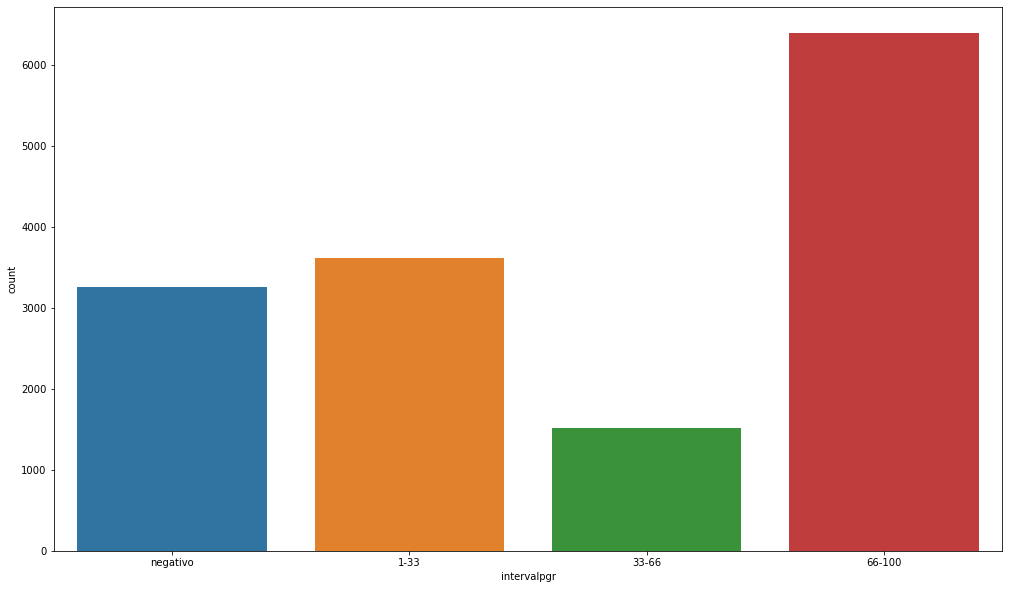

In [317]:
#pgr 0-10 5k - 91-100 - 66-100
plt.figure(figsize=(17, 10))
count = sns.countplot(df1['intervalpgr'],order=['negativo',  '1-33','33-66','66-100'])
                      #['negativo', '1-25', '26-50', '51-75' , '76-100'])
#['0-10','0-33', '11-20', '21-30', '31-40','33-66','41-50','51-60','61-70','66-100','71-80','81-90','91-100'])

C:\Users\Paola\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


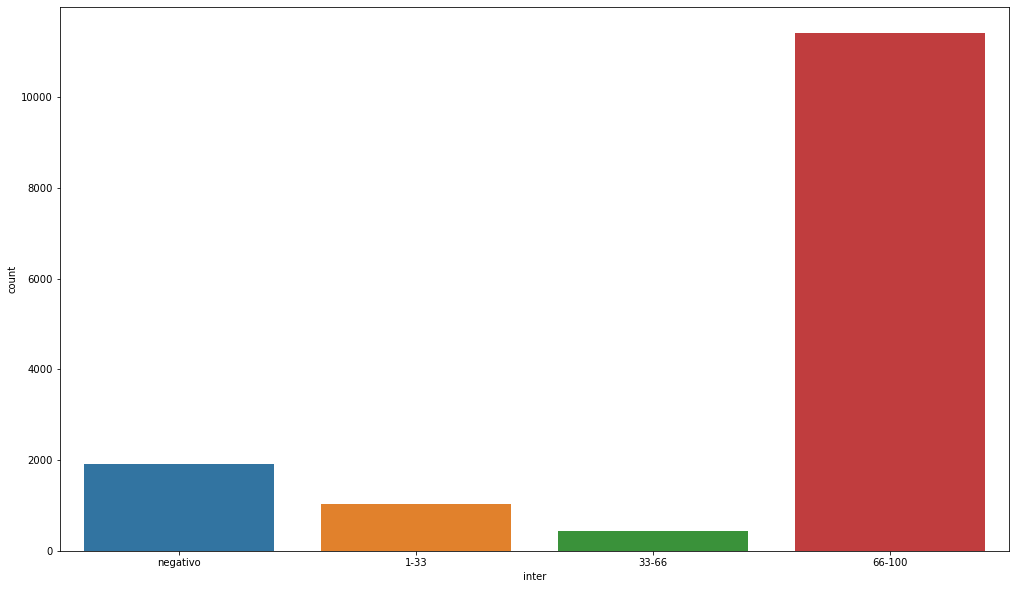

In [318]:
plt.figure(figsize=(17, 10))
count = sns.countplot(df1['inter'],order=['negativo',  '1-33','33-66','66-100'])

In [319]:
df1.inter.value_counts()  #unbalanced

66-100      11415
negativo     1905
1-33         1035
33-66         438
Name: inter, dtype: int64

In [321]:
#create the final dataset
df1 = df1.iloc[:,[2,9,10,11]]

df1.head(20)

,text_final,inter,lab,intervalpgr
0,carcinom mammell duttal situ aspett tip apocri...,66-100,0,33-66
1,carcinom mammell duttal situ aspett tip apocri...,66-100,0,33-66
2,carcinom invas mammellasottotip duttal nasgrad...,66-100,0,1-33
3,carcinom invas mammellasottotip duttal nasgrad...,66-100,0,1-33
4,risult esam immunoistochim effettuatier propor...,negativo,1,1-33
5,carcinom invas mammellagrad istolog ntiiinecr ...,negativo,1,negativo
6,carcinom invas mammellasottotip duttaletip ist...,66-100,0,1-33
7,carcinom invas mammellasottotip duttal nasgrad...,66-100,0,66-100
8,carcinom invas mammellasottotip duttaletip ist...,66-100,0,66-100
9,carcinom invas mammellasottotip duttaletip ist...,66-100,0,66-100


## Modelling

### Multiclass-multioutput classification

In [392]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.multioutput import MultiOutputClassifier 
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score, classification_report
from sklearn.svm import LinearSVC

In [453]:
df1['lab2'] = df1['intervalpgr'].factorize()[0]
df1.head()

,text_final,inter,lab,intervalpgr,lab2
0,carcinom mammell duttal situ aspett tip apocri...,66-100,0,33-66,0
1,carcinom mammell duttal situ aspett tip apocri...,66-100,0,33-66,0
2,carcinom invas mammellasottotip duttal nasgrad...,66-100,0,1-33,1
3,carcinom invas mammellasottotip duttal nasgrad...,66-100,0,1-33,1
4,risult esam immunoistochim effettuatier propor...,negativo,1,1-33,1
5,carcinom invas mammellagrad istolog ntiiinecr ...,negativo,1,negativo,2
6,carcinom invas mammellasottotip duttaletip ist...,66-100,0,1-33,1
7,carcinom invas mammellasottotip duttal nasgrad...,66-100,0,66-100,3
8,carcinom invas mammellasottotip duttaletip ist...,66-100,0,66-100,3
9,carcinom invas mammellasottotip duttaletip ist...,66-100,0,66-100,3


In [ ]:
#ER :  0:'66-100',1 : 'NEGATIVO', 2:'33-66', 3: '1-33'
#PGR: 0:'33:66',1 : '1-33', 2:'NEGATIVO', 3: '66:100' 

In [439]:
X = df1['text_final']
y = df1[['lab2','lab']]

In [434]:
X

0        carcinom mammell duttal situ aspett tip apocri...
1        carcinom mammell duttal situ aspett tip apocri...
2        carcinom invas mammellasottotip duttal nasgrad...
3        carcinom invas mammellasottotip duttal nasgrad...
4        risult esam immunoistochim effettuatier propor...
                               ...                        
14823    assett recettorial immunoreattiv membran herne...
14824    assett recettorial immunoreattiv membran herne...
14825    assett recettorial immunoreattiv membran herne...
14826    assett recettorial immunoreattiv membran herne...
14827    assett recettorial immunoreattiv membran herne...
Name: text_final, Length: 14793, dtype: object

In [435]:
y

,lab2,lab
0,0,0
1,0,0
2,1,0
3,1,0
4,1,1
...,...,...
14823,2,0
14824,3,0
14825,1,0
14826,1,0


In [440]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=42)

### XGBoost

In [326]:
pipeline_xgb =Pipeline([
                ('vect', CountVectorizer(tokenizer=word_tokenize)),
                ('tfidf', TfidfTransformer()),
                ('clf', MultiOutputClassifier(XGBClassifier())) ])

In [327]:
xgbparams = {
        'clf__estimator__learning_rate':[0.05, 0.10, 0.15, 0.20],
         'clf__estimator__max_depth' : [ 3, 4, 5, 6],
         "clf__estimator__min_child_weight" : [ 1, 3, 5, 7 ],
         "clf__estimator__gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4],
        "clf__estimator__colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7],
}

In [328]:
random_search = RandomizedSearchCV(pipeline_xgb,param_distributions=xgbparams,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\Paola\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('vect',
                                              CountVectorizer(tokenizer=<function word_tokenize at 0x000001B623F45820>)),
                                             ('tfidf', TfidfTransformer()),
                                             ('clf',
                                              MultiOutputClassifier(estimator=XGBClassifier(base_score=None,
                                                                                            booster=None,
                                                                                            callbacks=None,
                                                                                            colsample_bylevel=None,
                                                                                            colsample_bynode=None,
                                                                                            colsample_bytree=None,
                                                                                            early_stopping_rounds=None,...
                                                                                            num_parallel_tree=None,
                                                                                            predictor=None,
                                                                                            random_state=None, ...)))]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'clf__estimator__colsample_bytree': [0.3,
                                                                             0.4,
                                                                             0.5,
                                                                             0.7],
                                        'clf__estimator__gamma': [0.0, 0.1, 0.2,
                                                                  0.3, 0.4],
                                        'clf__estimator__learning_rate': [0.05,
                                                                          0.1,
                                                                          0.15,
                                                                          0.2],
                                        'clf__estimator__max_depth': [3, 4, 5,
                                                                      6],
                                        'clf__estimator__min_child_weight': [1,
                                                                             3,
                                                                             5,
                                                                             7]},
                   scoring='roc_auc', verbose=3)

In [329]:
xgb = random_search.best_estimator_
xgb

Pipeline(steps=[('vect',
                 CountVectorizer(tokenizer=<function word_tokenize at 0x000001B623F45820>)),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 MultiOutputClassifier(estimator=XGBClassifier(base_score=None,
                                                               booster=None,
                                                               callbacks=None,
                                                               colsample_bylevel=None,
                                                               colsample_bynode=None,
                                                               colsample_bytree=0.5,
                                                               early_stopping_rounds=None,
                                                               enable_categorical=False,
                                                               eval_metri...
                                                               gpu_id=None,
                                                               grow_policy=None,
                                                               importance_type=None,
                                                               interaction_constraints=None,
                                                               learning_rate=0.2,
                                                               max_bin=None,
                                                               max_cat_threshold=None,
                                                               max_cat_to_onehot=None,
                                                               max_delta_step=None,
                                                               max_depth=5,
                                                               max_leaves=None,
                                                               min_child_weight=3,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               n_estimators=100,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               predictor=None,
                                                               random_state=None, ...)))])

In [330]:
pred_xgb = xgb.predict(X_test)
pred_xgb

array([[2, 1],
       [1, 2],
       [2, 1],
       ...,
       [3, 0],
       [3, 0],
       [3, 0]], dtype=int64)

In [331]:
def Extract(lst):
    l1 = []
    l1 = [item[0] for item in lst]
    return l1

def Extract2(lst):
    l1 = []
    l1 = [item[1] for item in lst]
    return l1

In [430]:
f1_score_pgr = []
f1_score_er = []

In [431]:
pred_xgb

array([[2, 1],
       [1, 2],
       [2, 1],
       ...,
       [3, 0],
       [3, 0],
       [3, 0]], dtype=int64)

In [437]:
e2

14689    2
12624    1
13236    2
13726    1
6178     3
        ..
14056    2
5235     3
4039     3
3356     3
1438     0
Name: lab2, Length: 4882, dtype: int64

In [462]:
e1 = Extract(pred_xgb)
e2 = y_test['lab2']
f1_pr_xgb = f1_score(e2, e1, average = 'weighted')
f1_pr_xgb

0.6834833506600363

In [463]:
e3 = Extract2(pred_xgb)
e4 = y_test['lab']
f1_er_xgb = f1_score(e4, e3, average = 'weighted')
              #'weighted')
f1_er_xgb

0.898559973531197

In [455]:
#see that accuracy is less than f1 score thats due unbalanced data
xgb.fit(X_train,y_train)
xgb_score = xgb.score(X_test,y_test)
xgb_score

0.665096272019664

In [335]:
#print(multilabel_confusion_matrix(y_test, pred_xgb[1]))
print(classification_report(e2, e1))
#The macro-averaged F1 score (or macro F1 score) is computed using the arithmetic mean (aka unweighted mean) 
#of all the per-class F1 scores.

#PGR: 0:'33:66',1 : '1-33', 2:'NEGATIVO', 3: '66:100' 


              precision    recall  f1-score   support

           0       0.77      0.16      0.27       493
           1       0.73      0.47      0.57      1190
           2       0.86      0.79      0.82      1070
           3       0.66      0.94      0.77      2129

    accuracy                           0.71      4882
   macro avg       0.75      0.59      0.61      4882
weighted avg       0.73      0.71      0.68      4882



In [336]:
#ER :  0:'66-100',1 : 'NEGATIVO', 2:'33-66', 3: '1-33'
print(classification_report(e4, e3))

#WORST PREDICTION IN 33-66 but it's the class with lowest support

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      3781
           1       0.92      0.72      0.81       609
           2       0.86      0.19      0.31       129
           3       0.94      0.61      0.74       363

    accuracy                           0.91      4882
   macro avg       0.91      0.63      0.70      4882
weighted avg       0.91      0.91      0.90      4882



In [ ]:
df1[['intervalpgr', 'lab2']].head(20)

In [350]:
label_id_df = df1[['intervalpgr', 'lab2']].drop_duplicates().sort_values('intervalpgr')
label_to_id = dict(label_id_df.values)
label_to_id

{'1-33': 1, '33-66': 0, '66-100': 3, 'negativo': 2}

In [338]:
df1.intervalpgr.value_counts()

66-100      6396
1-33        3622
negativo    3254
33-66       1521
Name: intervalpgr, dtype: int64

In [343]:
df1.head()

,text_final,inter,lab,intervalpgr,lab2
0,carcinom mammell duttal situ aspett tip apocri...,66-100,0,33-66,0
1,carcinom mammell duttal situ aspett tip apocri...,66-100,0,33-66,0
2,carcinom invas mammellasottotip duttal nasgrad...,66-100,0,1-33,1
3,carcinom invas mammellasottotip duttal nasgrad...,66-100,0,1-33,1
4,risult esam immunoistochim effettuatier propor...,negativo,1,1-33,1


In [345]:
label_id_df = df1[['inter', 'lab']].drop_duplicates().sort_values('lab')
label_to_id = dict(label_id_df.values)
label_to_id
label_id_df

,inter,lab
0,66-100,0
4,negativo,1
10,33-66,2
14,1-33,3


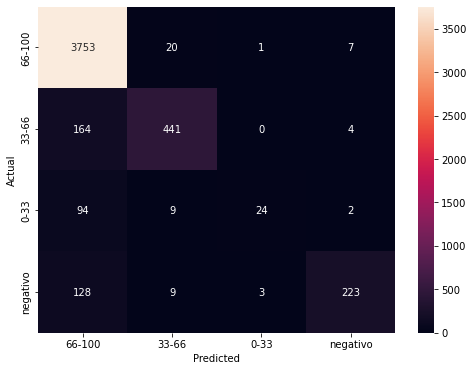

In [355]:
#crea dizionario
conf_mat = confusion_matrix(e4, e3)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=['66-100', '33-66','0-33','negativo'], yticklabels=['66-100', '33-66','0-33','negativo'])
            #yticklabels=label_id_df.intervalpgr.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
### Logistic regression

In [356]:

pipe_lr = Pipeline(steps=[('vect', CountVectorizer(tokenizer=word_tokenize)),
                          ('tfidf', TfidfTransformer()),
                          ('lr_multi',MultiOutputClassifier(LogisticRegression(multi_class='multinomial')))])

In [367]:
lrparam= {
          'lr_multi__estimator__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0]
         }

In [368]:
pipe_lr.get_params()

{'memory': None,
 'steps': [('vect',
   CountVectorizer(tokenizer=<function word_tokenize at 0x000001B623F45820>)),
  ('tfidf', TfidfTransformer()),
  ('lr_multi',
   MultiOutputClassifier(estimator=LogisticRegression(multi_class='multinomial')))],
 'verbose': False,
 'vect': CountVectorizer(tokenizer=<function word_tokenize at 0x000001B623F45820>),
 'tfidf': TfidfTransformer(),
 'lr_multi': MultiOutputClassifier(estimator=LogisticRegression(multi_class='multinomial')),
 'vect__analyzer': 'word',
 'vect__binary': False,
 'vect__decode_error': 'strict',
 'vect__dtype': numpy.int64,
 'vect__encoding': 'utf-8',
 'vect__input': 'content',
 'vect__lowercase': True,
 'vect__max_df': 1.0,
 'vect__max_features': None,
 'vect__min_df': 1,
 'vect__ngram_range': (1, 1),
 'vect__preprocessor': None,
 'vect__stop_words': None,
 'vect__strip_accents': None,
 'vect__token_pattern': '(?u)\\b\\w\\w+\\b',
 'vect__tokenizer': <function nltk.tokenize.word_tokenize(text, language='english', preserve_line=F

In [369]:
random_search = RandomizedSearchCV(pipe_lr,param_distributions=lrparam,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\Paola\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('vect',
                                              CountVectorizer(tokenizer=<function word_tokenize at 0x000001B623F45820>)),
                                             ('tfidf', TfidfTransformer()),
                                             ('lr_multi',
                                              MultiOutputClassifier(estimator=LogisticRegression(multi_class='multinomial')))]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'lr_multi__estimator__C': [0.001, 0.01,
                                                                   0.05, 0.1,
                                                                   0.5, 1.0,
                                                                   10.0]},
                   scoring='roc_auc', verbose=3)

In [370]:
logreg = random_search.best_estimator_
logreg

Pipeline(steps=[('vect',
                 CountVectorizer(tokenizer=<function word_tokenize at 0x000001B623F45820>)),
                ('tfidf', TfidfTransformer()),
                ('lr_multi',
                 MultiOutputClassifier(estimator=LogisticRegression(C=0.1,
                                                                    multi_class='multinomial')))])

In [371]:
pred_lr = logreg.predict(X_test)
pred_lr

array([[2, 1],
       [1, 0],
       [2, 0],
       ...,
       [3, 0],
       [3, 0],
       [3, 0]], dtype=int64)

In [464]:
e1 = Extract(pred_lr)
e2 = y_test['lab2']
f1_pr_lr = f1_score(e2, e1, average = 'weighted')
f1_pr_lr

0.5622504301289675

In [465]:
e3 = Extract2(pred_xgb)
e4 = y_test['lab']
f1_er_lr = f1_score(e4, e3, average = 'weighted')
f1_er_lr

0.898559973531197

In [376]:
# Fit on Dataset
logreg.fit(X_train,y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(tokenizer=<function word_tokenize at 0x000001B623F45820>)),
                ('tfidf', TfidfTransformer()),
                ('lr_multi',
                 MultiOutputClassifier(estimator=LogisticRegression(C=0.1,
                                                                    multi_class='multinomial')))])

In [456]:
lr = logreg.score(X_test,y_test)
lr

0.5374846374436706

In [ ]:
### KNN

In [378]:
pipeline_knn =Pipeline([
                ('vect', CountVectorizer(tokenizer=word_tokenize)),
                ('tfidf', TfidfTransformer()),
                ('knn', MultiOutputClassifier(KNeighborsClassifier())) ])

In [379]:
knnparams = {
                'knn__estimator__n_neighbors' :[1,2,3,5,10],
                'knn__estimator__weights' : ['uniform','distance'],
                'knn__estimator__metric' : ['minkowski','euclidean','manhattan']
}

In [380]:
random_search = RandomizedSearchCV(pipeline_knn,param_distributions=knnparams,n_iter=6,scoring='f1_micro',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\Paola\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('vect',
                                              CountVectorizer(tokenizer=<function word_tokenize at 0x000001B623F45820>)),
                                             ('tfidf', TfidfTransformer()),
                                             ('knn',
                                              MultiOutputClassifier(estimator=KNeighborsClassifier()))]),
                   n_iter=6, n_jobs=-1,
                   param_distributions={'knn__estimator__metric': ['minkowski',
                                                                   'euclidean',
                                                                   'manhattan'],
                                        'knn__estimator__n_neighbors': [1, 2, 3,
                                                                        5, 10],
                                        'knn__estimator__weights': ['uniform',
                                                                    'distance']},
                   scoring='f1_micro', verbose=3)

In [382]:
knn = random_search.best_estimator_
knn

Pipeline(steps=[('vect',
                 CountVectorizer(tokenizer=<function word_tokenize at 0x000001B623F45820>)),
                ('tfidf', TfidfTransformer()),
                ('knn',
                 MultiOutputClassifier(estimator=KNeighborsClassifier(metric='euclidean',
                                                                      n_neighbors=1)))])

In [383]:
pred_knn = xgb.predict(X_test)
pred_knn

array([[2, 1],
       [1, 2],
       [2, 1],
       ...,
       [3, 0],
       [3, 0],
       [3, 0]], dtype=int64)

In [ ]:
knn.fit(X_train,y_train)

In [478]:
e1 = Extract(pred_knn)
e2 = y_test['lab2']
f1_pr_knn = f1_score(e2, e1, average = 'weighted')
f1_pr_knn 

0.6834833506600363

In [477]:
e3 = Extract2(pred_knn)
e4 = y_test['lab']
f1_er_knn  = f1_score(e4, e3, average = 'weighted')
f1_er_knn 

0.898559973531197

In [457]:
knn_score = knn.score(X_test,y_test)
knn_score

0.6669397787791889

In [224]:
### SVC

In [393]:
pipeline_svc =Pipeline([
                ('vect', CountVectorizer(tokenizer=word_tokenize)),
                ('tfidf', TfidfTransformer()),
                ('svc', MultiOutputClassifier(LinearSVC())) ])


In [394]:
pipeline_svc.fit(X_train,y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(tokenizer=<function word_tokenize at 0x000001B623F45820>)),
                ('tfidf', TfidfTransformer()),
                ('svc', MultiOutputClassifier(estimator=LinearSVC()))])

In [395]:
pipeline_svc.score(X_test,y_test)

0.6884473576403114

In [396]:
pipeline_svc.get_params()

{'memory': None,
 'steps': [('vect',
   CountVectorizer(tokenizer=<function word_tokenize at 0x000001B623F45820>)),
  ('tfidf', TfidfTransformer()),
  ('svc', MultiOutputClassifier(estimator=LinearSVC()))],
 'verbose': False,
 'vect': CountVectorizer(tokenizer=<function word_tokenize at 0x000001B623F45820>),
 'tfidf': TfidfTransformer(),
 'svc': MultiOutputClassifier(estimator=LinearSVC()),
 'vect__analyzer': 'word',
 'vect__binary': False,
 'vect__decode_error': 'strict',
 'vect__dtype': numpy.int64,
 'vect__encoding': 'utf-8',
 'vect__input': 'content',
 'vect__lowercase': True,
 'vect__max_df': 1.0,
 'vect__max_features': None,
 'vect__min_df': 1,
 'vect__ngram_range': (1, 1),
 'vect__preprocessor': None,
 'vect__stop_words': None,
 'vect__strip_accents': None,
 'vect__token_pattern': '(?u)\\b\\w\\w+\\b',
 'vect__tokenizer': <function nltk.tokenize.word_tokenize(text, language='english', preserve_line=False)>,
 'vect__vocabulary': None,
 'tfidf__norm': 'l2',
 'tfidf__smooth_idf': Tr

In [398]:
svc_params = {'svc__estimator__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
    
}

In [399]:
random_search = RandomizedSearchCV(pipeline_svc,param_distributions=svc_params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\Paola\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('vect',
                                              CountVectorizer(tokenizer=<function word_tokenize at 0x000001B623F45820>)),
                                             ('tfidf', TfidfTransformer()),
                                             ('svc',
                                              MultiOutputClassifier(estimator=LinearSVC()))]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'svc__estimator__C': [0.001, 0.01, 0.05,
                                                              0.1, 0.5, 1.0,
                                                              10.0]},
                   scoring='roc_auc', verbose=3)

In [400]:
svc = random_search.best_estimator_
svc

Pipeline(steps=[('vect',
                 CountVectorizer(tokenizer=<function word_tokenize at 0x000001B623F45820>)),
                ('tfidf', TfidfTransformer()),
                ('svc', MultiOutputClassifier(estimator=LinearSVC(C=0.05)))])

In [401]:
pred_svc = svc.predict(X_test)


In [469]:
e1 = Extract(pred_svc)
e2 = y_test['lab2']
f1_pr_svc = f1_score(e2, e1, average = 'weighted')
f1_pr_svc

0.6008109134742919

In [476]:
e3 = Extract2(pred_svc)
e4 = y_test['lab']
f1_er_svc = f1_score(e4, e3, average = 'weighted')
f1_er_svc

0.8257933506997235

In [458]:
svc.fit(X_train, y_train)
svc_score=  svc.score(X_test,y_test)
svc_score

0.568209750102417

In [486]:
model_selection = pd.DataFrame({'model':['XGB', "Logistic Regression","KNN", "SVC"], 
                               'test accuracy':[xgb_score,lr, knn_score, svc_score]})
model_selection.sort_values(by = ['test accuracy'],ascending= False)

,model,test accuracy
2,KNN,0.666940
0,XGB,0.665096
3,SVC,0.568210
1,Logistic Regression,0.537485


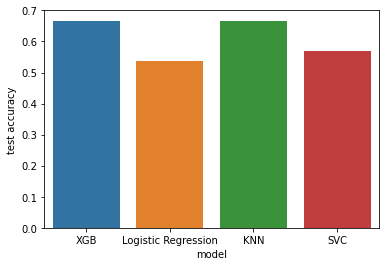

In [460]:
sns.barplot(x = 'model',
            y = 'test accuracy',
            data = model_selection)
 
# Show the plot
plt.show()

In [481]:
model_selection_f1_pr = pd.DataFrame({'model':['XGB', "Logistic Regression","KNN", "SVC"], 
                               'f1 score':[f1_pr_xgb,f1_pr_lr, f1_pr_knn,f1_pr_svc]})
model_selection_f1_pr.sort_values(by = ['f1 score'],ascending= False)


,model,f1 score
0,XGB,0.683483
2,KNN,0.683483
3,SVC,0.600811
1,Logistic Regression,0.562250


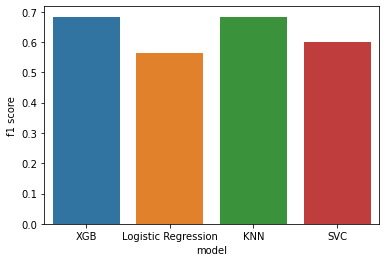

In [493]:
sns.barplot(x = 'model',
            y = 'f1 score',
            data = model_selection_f1_pr)
 
# Show the plot
plt.show()

In [494]:
model_selection_f1_er = pd.DataFrame({'model':['XGB', "Logistic Regression","KNN", "SVC"], 
                               'f1 score':[f1_er_xgb,f1_er_lr, f1_er_knn, f1_er_svc]})
model_selection_f1_er.sort_values(by = ['f1 score'],ascending= False)

,model,f1 score
0,XGB,0.898560
1,Logistic Regression,0.898560
2,KNN,0.898560
3,SVC,0.825793


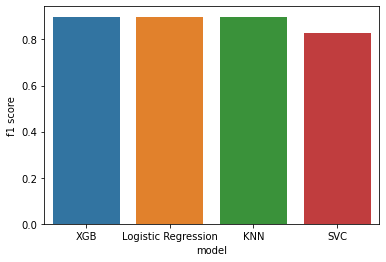

In [498]:
sns.barplot(x = 'model',
            y = 'f1 score',
            data = model_selection_f1_er)
 
# Show the plot
plt.show()

### Multiclass classification: HER2 prediction

In [ ]:
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score
from sklearn import metrics


In [404]:
df2 = data.iloc[:,[12,20]]
df2= df2[df2['her2'] != "nan"]
df2= df2[df2['her2'] != "negativo"]
df2= df2[df2['her2'] != "positivo"]
#df2['lab'] = df2['her2'].factorize()[0]
df2

,her2,text_final
1,3+,carcinom mammell duttal situ aspett tip apocri...
11,3+,carcinom mammell duttal situ aspett tip apocri...
20,1+,carcinom invas mammellasottotip duttal nasgrad...
28,1+,carcinom invas mammellasottotip duttal nasgrad...
39,0,risult esam immunoistochim effettuatier propor...
...,...,...
74859,1+,assett recettorial immunoreattiv membran herne...
74861,1+,assett recettorial immunoreattiv membran herne...
74865,2+,assett recettorial immunoreattiv membran herne...
74866,3+,assett recettorial immunoreattiv membran herne...


In [405]:
her2_dict = {
    '0': 'negativo', 
    '1+': 'negativo', 
    '2+': 'borderline',
    '3+': 'positivo'
}

df2['classes'] = df2['her2'].map(her2_dict)

encoding_dict = { 'negativo': 1,
                 'borderline': 2,
                 'positivo':3
}

df2['lab'] = df2['classes'].map(encoding_dict)
df2

,her2,text_final,classes,lab
1,3+,carcinom mammell duttal situ aspett tip apocri...,positivo,3
11,3+,carcinom mammell duttal situ aspett tip apocri...,positivo,3
20,1+,carcinom invas mammellasottotip duttal nasgrad...,negativo,1
28,1+,carcinom invas mammellasottotip duttal nasgrad...,negativo,1
39,0,risult esam immunoistochim effettuatier propor...,negativo,1
...,...,...,...,...
74859,1+,assett recettorial immunoreattiv membran herne...,negativo,1
74861,1+,assett recettorial immunoreattiv membran herne...,negativo,1
74865,2+,assett recettorial immunoreattiv membran herne...,borderline,2
74866,3+,assett recettorial immunoreattiv membran herne...,positivo,3


C:\Users\Paola\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


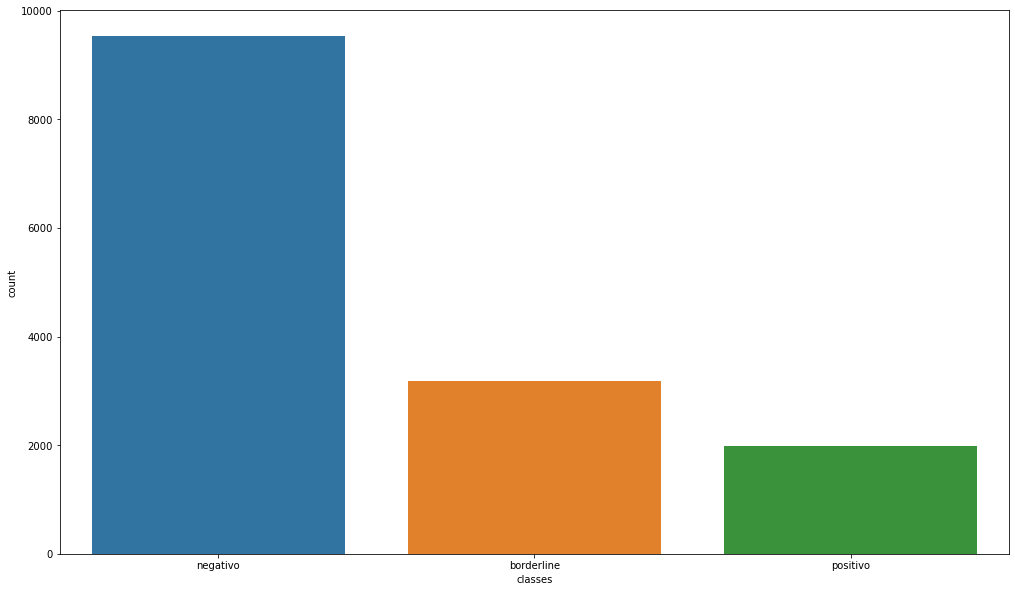

In [428]:
plt.figure(figsize=(17, 10))
count = sns.countplot(df2['classes'],order=['negativo','borderline','positivo'])

In [406]:

category_id_df = df2[['classes', 'lab']].drop_duplicates().sort_values('lab')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['lab', 'classes']].values)


In [407]:
category_id_df

,classes,lab
20,negativo,1
45,borderline,2
1,positivo,3


In [ ]:
id_to_category

In [408]:
#non si può usare stop_words='italiano' solo inglese

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2))

features = tfidf.fit_transform(df2.text_final).toarray()
labels = df2.lab
features.shape

(14707, 10532)

In [409]:
N = 2

for classes, lab in sorted(category_to_id.items()):
  features_chi2 = chi2(features,  np.array(df2.lab))
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(classes))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))


C:\Users\Paola\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'borderline':
  . Most correlated unigrams:
. intens
. fortement
  . Most correlated bigrams:
. debol posit
. dak fortement


C:\Users\Paola\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'negativo':
  . Most correlated unigrams:
. intens
. fortement
  . Most correlated bigrams:
. debol posit
. dak fortement
# 'positivo':
  . Most correlated unigrams:
. intens
. fortement
  . Most correlated bigrams:
. debol posit
. dak fortement


C:\Users\Paola\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [411]:
X_train, X_test, y_train, y_test = train_test_split(df2['text_final'], df2['classes'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
df1['text_cleaned'][25]

In [ ]:
print(clf.predict(count_vect.transform(["carcinoma invasivo mammellasottotipoduttalegrado istologico ntiinecrosi tumoraleassentecalcificazioniassentiinvasione vascolare peritumoralenon identificatainvasione perineuralenon identificatadimensioni neoplasia invasiva cmalterazioni morfologiche riferibili trattamento chemioterapico estese piano profondolibero neoplasiadue linfonodi sede metastasi quindici linfonodi esaminati popolazione neoplastica vitale inferiore metastasi esaminate risultano costiutite prevalentemente tessuto fibroso involuzione scleroticacarcinoma duttale situtipo istologico solido cribriformegrado nucleare iidimensioni focolaio pi grande carcinoma duttale situ mmassetto recettoriale immunoreattivita membrana herneu frazione proliferanteer proporzione cellule positive sezione esaminata pgr proporzione cellule positive sezione esaminata eimmunoreattivit membrana herneu anticorpo policlonale dako negativo frazione proliferante ki pari ghiandola mammaria linf ascellari snan"])))

In [ ]:
df1['int'][25]

In [412]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])


C:\Users\Paola\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Paola\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

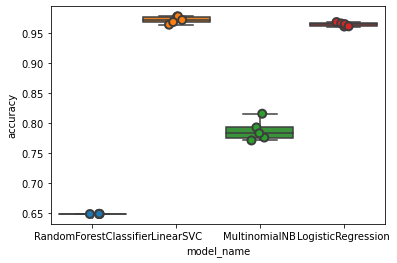

In [413]:
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [414]:
model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df2.index, test_size=0.40, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

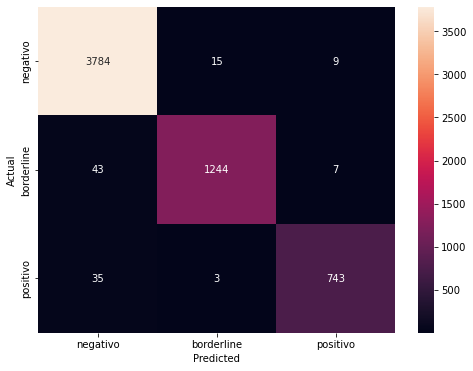

In [415]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.classes.values, yticklabels=category_id_df.classes.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [417]:
model = LogisticRegression(random_state=0)

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df2.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

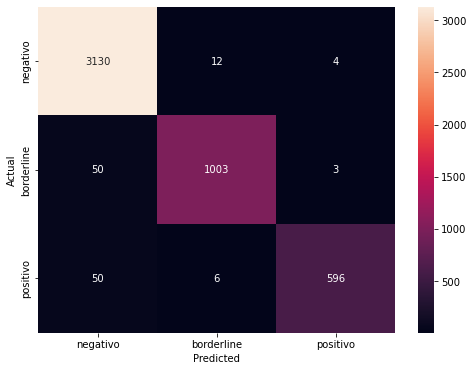

In [420]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.classes.values, yticklabels=category_id_df.classes.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [421]:
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=category_id_df.classes.values))

              precision    recall  f1-score   support

    negativo       0.97      0.99      0.98      3146
  borderline       0.98      0.95      0.97      1056
    positivo       0.99      0.91      0.95       652

    accuracy                           0.97      4854
   macro avg       0.98      0.95      0.97      4854
weighted avg       0.97      0.97      0.97      4854



In [ ]:
--

In [ ]:
xgb.fit(X_train,y_train)
xgb.score(X_test,y_test)

In [ ]:

ypred = xgbc.predict(xtest)
cm = confusion_matrix(ytest,ypred)

In [ ]:
print(random_search.fit(X_train, y_train).predict(["carcinoma invasivo mammellasottotipoduttalegrado istologico ntiinecrosi tumoraleassentecalcificazioniassentiinvasione vascolare peritumoralenon identificatainvasione perineuralenon identificatadimensioni neoplasia invasiva cmalterazioni morfologiche riferibili trattamento chemioterapico estese piano profondolibero neoplasiadue linfonodi sede metastasi quindici linfonodi esaminati popolazione neoplastica vitale inferiore metastasi esaminate risultano costiutite prevalentemente tessuto fibroso involuzione scleroticacarcinoma duttale situtipo istologico solido cribriformegrado nucleare iidimensioni focolaio pi grande carcinoma duttale situ mmassetto recettoriale immunoreattivita membrana herneu frazione proliferanteer proporzione cellule positive sezione esaminata pgr proporzione cellule positive sezione esaminata eimmunoreattivit membrana herneu anticorpo policlonale dako negativo frazione proliferante ki pari ghiandola mammaria linf ascellari snan"]))

In [ ]:
--

In [ ]:
# Prediction Prob
print(pipe_lr.classes_)
pipe_lr.predict_proba([ex1])

In [ ]:
pipeline_knn.predict_proba([ex1])

In [ ]:
pipeline_svc.predict([ex1])